In [1]:
import kagglehub
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
PROJECT_DIR = Path.cwd().parent
DATA_DIR = PROJECT_DIR / "data"

In [3]:
if not DATA_DIR.exists():
    DATA_DIR.mkdir(parents=True, exist_ok=True)

In [4]:
# Download to default kagglehub cache
path = kagglehub.dataset_download("yasserh/titanic-dataset")
# Copy to the data folder
source_path = Path(path)
for file in source_path.iterdir():
    if file.is_file():
        destination = DATA_DIR / file.name
        if not destination.exists():
            destination.write_bytes(file.read_bytes())
            print(f"Copied {file.name} to {DATA_DIR}")
        else:
            print(f"File {file.name} already exists in {DATA_DIR}")

File Titanic-Dataset.csv already exists in /Users/anatolii/Projects/ml-engineering/titanic-survivors/data


In [5]:
ds = pd.read_csv(DATA_DIR/"Titanic-Dataset.csv")

In [6]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Visualization 

In [7]:
ds_survived = ds[ds['Survived'] == 1]
# ds_survived = ds_survived[['Survived', 'Pclass', 'Sex', 'Age', 'Embarked']]

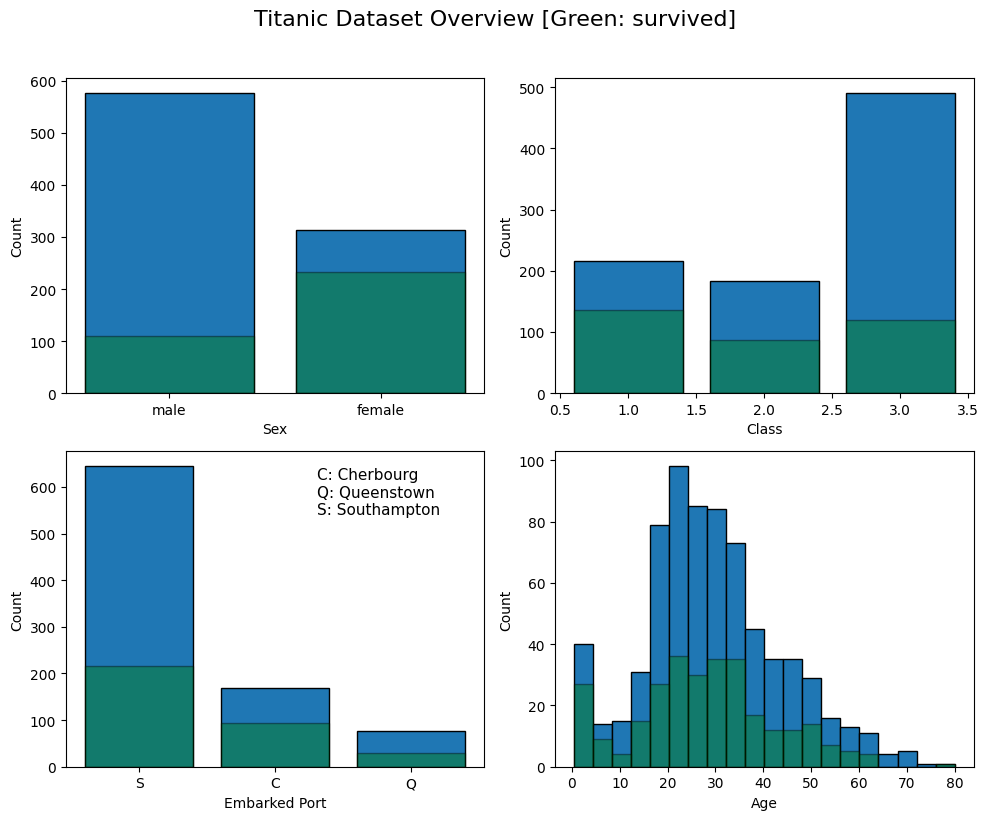

In [8]:
fig, axs = plt.subplots(2,2, figsize=(10,8))
colors = sns.color_palette("tab10")

# Sex distribution
sex_counts = ds['Sex'].value_counts()
sex_counts_survived = ds_survived['Sex'].value_counts()
axs[0,0].bar(sex_counts.index, sex_counts.values, edgecolor='black')
axs[0,0].bar(sex_counts_survived.index, sex_counts_survived.values, edgecolor='black', color='green', alpha=0.4)
axs[0,0].set_xlabel('Sex')
axs[0,0].set_ylabel('Count')


# Passanger's class distributiuon
pclass_counts = ds['Pclass'].value_counts()
pclass_counts_survived = ds_survived['Pclass'].value_counts()
axs[0,1].bar(pclass_counts.index, pclass_counts.values, edgecolor='black')
axs[0,1].bar(pclass_counts_survived.index, pclass_counts_survived.values, edgecolor='black', color='green', alpha=0.4)
axs[0,1].set_xlabel('Class')
axs[0,1].set_ylabel('Count')


# Embarked port
embarked_counts = ds['Embarked'].value_counts()
embarked_counts_survived = ds_survived['Embarked'].value_counts()
axs[1,0].bar(embarked_counts.index, embarked_counts.values, edgecolor='black')
axs[1,0].bar(embarked_counts_survived.index, embarked_counts_survived.values, edgecolor='black', color='green', alpha=0.4)
axs[1,0].set_xlabel('Embarked Port')
axs[1,0].set_ylabel('Count')
port_desc = 'C: Cherbourg\nQ: Queenstown\nS: Southampton'
axs[1,0].text(0.6, 0.95, port_desc, transform=axs[1,0].transAxes,
              fontsize=11, verticalalignment='top', horizontalalignment='left')

axs[1,1].hist(ds['Age'].dropna(), bins=20 ,edgecolor='black')
axs[1,1].set_xlabel('Age')
axs[1,1].set_ylabel('Count')
axs[1,1].hist(ds_survived['Age'].dropna(), bins=20, edgecolor='black', color='green', alpha=0.4, label='Survived')

fig.suptitle('Titanic Dataset Overview [Green: survived]', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [9]:
# Check dataset on missing values and dtype
for column in ds:
    nans = ds[column].isna().sum()
    dtype = ds[column].dtype
    print(f"Column: {column:15} | NaNs: {nans:3} | Type: {dtype}")

Column: PassengerId     | NaNs:   0 | Type: int64
Column: Survived        | NaNs:   0 | Type: int64
Column: Pclass          | NaNs:   0 | Type: int64
Column: Name            | NaNs:   0 | Type: object
Column: Sex             | NaNs:   0 | Type: object
Column: Age             | NaNs: 177 | Type: float64
Column: SibSp           | NaNs:   0 | Type: int64
Column: Parch           | NaNs:   0 | Type: int64
Column: Ticket          | NaNs:   0 | Type: object
Column: Fare            | NaNs:   0 | Type: float64
Column: Cabin           | NaNs: 687 | Type: object
Column: Embarked        | NaNs:   2 | Type: object


In [10]:
# Check dataset info
print("Dataset Info:")
print(ds.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [11]:
print("Missing Values:")
print(ds.isna().sum())

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
print("Data Types:")
print(ds.dtypes)

Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### Ideas

In [13]:
df = ds.copy()

In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df['Cabin'].notna()

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Cabin, Length: 891, dtype: bool

In [16]:
df['Age'] = df['Age'].fillna(df['Age'].median())  # Replace NaNs with median
df = df.dropna(subset=['Embarked'])  # drop Embarked NaNs
df['Cabin'] = df['Cabin'].notna().astype(int)  # most of the Cabin are missing. So the idea is to make it as a feature
df = df.drop(columns=['PassengerId','Name','Ticket'])

In [17]:
ds.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [18]:
df['Sex_encoded'] = df['Sex'].map({'male':0,'female':1})

In [19]:
df.groupby('Embarked')['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [20]:
df2 = pd.get_dummies(df['Embarked']).astype('int') # onehot encoding 
df = pd.concat([df,df2], axis=1)
df.drop(columns=['Sex','Embarked'], inplace=True)

<Axes: >

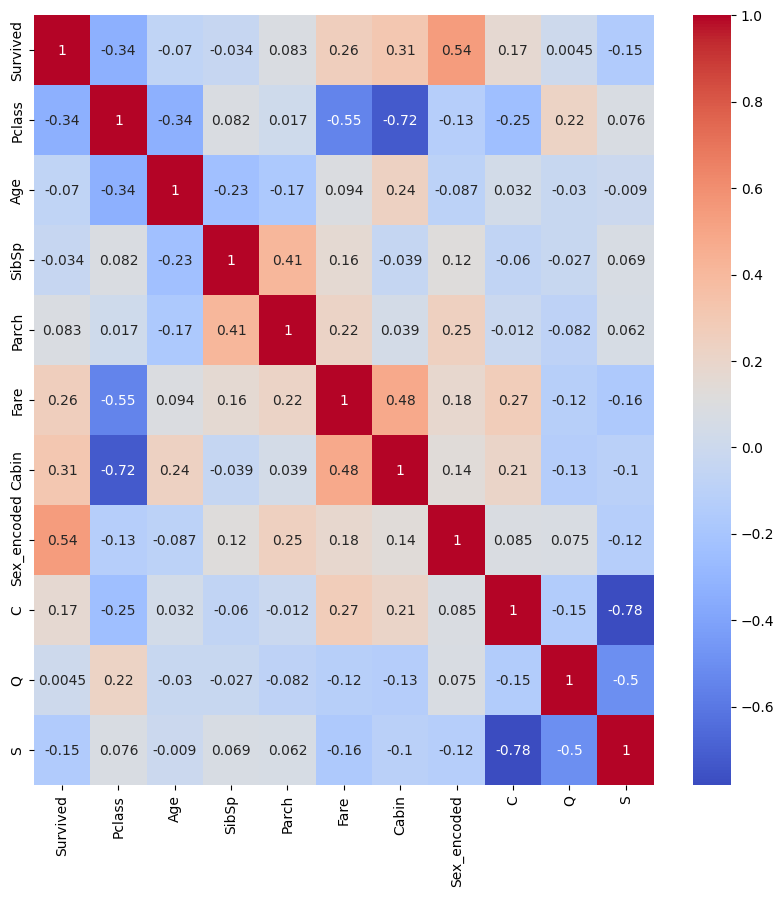

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')